In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 2.4 MB/s 


In [ ]:
import tensorflow_addons as tfa
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda
import glob
import os
import cv2

# Download Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=897275c2c2346edcd5da3ff663bfc6577245de530390ccca2f19ff203639f742
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
#!kaggle datasets download -d mouadriali/affectnetsample
!kaggle datasets download -d ptfrwrd/affectnet

100% 4.28G/4.29G [01:13<00:00, 57.9MB/s]
100% 4.29G/4.29G [01:13<00:00, 62.9MB/s]


In [ ]:
!mkdir data

In [ ]:
!mkdir datafer

In [ ]:
!unzip /content/affectnet.zip -d /content/data

In [ ]:
!rm /content/affectnet.zip

In [ ]:
!kaggle datasets download -d msambare/fer2013

 75% 45.0M/60.3M [00:00<00:00, 125MB/s]
100% 60.3M/60.3M [00:00<00:00, 144MB/s]


In [ ]:
!unzip /content/fer2013.zip -d /content/datafer

In [ ]:
!rm /content/affectnet.zip

rm: cannot remove '/content/affectnet.zip': No such file or directory


# Creating TFRecords

In [ ]:
int2label = {0: "Neutral",
             1: "Happy",
             2: "Sad",
             3: "Surprise",
             4: "Fear",
             5: "Disgust",
             6: "anger",
             7: "Contempt"}

In [ ]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [ ]:
def serialize_example(img, img_name, label):
  feature = {
      'image': _bytes_feature(img),
      'image_name': _bytes_feature(img_name),
      'target': _int64_feature(label)
  }
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [ ]:
image_size= 224

In [ ]:
save_path = '/content/drive/MyDrive/AffectNet/data/train'
paths = ['/content/data/train_val_by_class/train_class/class001',
         '/content/data/train_val_by_class/train_class/class002',
         '/content/data/train_val_by_class/train_class/class003',
         '/content/data/train_val_by_class/train_class/class004',
         '/content/data/train_val_by_class/train_class/class005',
         '/content/data/train_val_by_class/train_class/class006',
         '/content/data/train_val_by_class/train_class/class007',
         '/content/data/train_val_by_class/train_class/class008']
number_of_train_samples = []
for c,p in enumerate(paths):
  print(c)
  class_name=p.split('/')[-1]
  images = glob.glob(os.path.join(p,'*.jpg'))
  number_of_train_samples.append(len(images))
  with tf.io.TFRecordWriter(os.path.join(save_path, class_name+'.tfrec')) as writer:
    for img_path in images:
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Fix incorrect colors
      img = cv2.resize(img, (image_size, image_size))
      img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()
      name = img_path.split('/')[-1]
      target = c
      example = serialize_example(img, str.encode(name),target)
      writer.write(example)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


1
2
3
4
5
6
7


In [ ]:
save_path = '/content/drive/MyDrive/AffectNet/data/val'
paths = ['/content/data/train_val_by_class/val_class/class001',
         '/content/data/train_val_by_class/val_class/class002',
         '/content/data/train_val_by_class/val_class/class003',
         '/content/data/train_val_by_class/val_class/class004',
         '/content/data/train_val_by_class/val_class/class005',
         '/content/data/train_val_by_class/val_class/class006',
         '/content/data/train_val_by_class/val_class/class007',
         '/content/data/train_val_by_class/val_class/class008']
number_of_val_samples = []
for c,p in enumerate(paths):
  print(c)
  class_name=p.split('/')[-1]
  images = glob.glob(os.path.join(p,'*.jpg'))
  number_of_val_samples.append(len(images))
  with tf.io.TFRecordWriter(os.path.join(save_path, class_name+'.tfrec')) as writer:
    for img_path in images:
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Fix incorrect colors
      img = cv2.resize(img, (image_size, image_size))
      img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()
      name = img_path.split('/')[-1]
      target = c
      example = serialize_example(img, str.encode(name),target)
      writer.write(example)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


1
2
3
4
5
6
7


In [ ]:
save_path = '/content/drive/MyDrive/AffectNet/data/train'
classes = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']
number_of_train_samples = []
for c,name in enumerate(classes):
  p= os.path.join('/content/datafer/train', name)
  print(c)
  images = glob.glob(os.path.join(p,'*.jpg'))
  number_of_train_samples.append(len(images))
  with tf.io.TFRecordWriter(os.path.join(save_path, name+'.tfrec')) as writer:
    for img_path in images:
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Fix incorrect colors
      img = cv2.resize(img, (image_size, image_size))
      img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()
      name = img_path.split('/')[-1]
      target = c
      example = serialize_example(img, str.encode(name),target)
      writer.write(example)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


1
2
3
4
5
6


In [ ]:
number_of_train_samples

[4965, 7215, 4830, 3171, 4097, 436, 3995]

In [ ]:
save_path = '/content/drive/MyDrive/AffectNet/data/val'
classes = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']
number_of_val_samples = []
for c,name in enumerate(classes):
  p= os.path.join('/content/datafer/test', name)
  print(c)
  images = glob.glob(os.path.join(p,'*.jpg'))
  number_of_val_samples.append(len(images))
  with tf.io.TFRecordWriter(os.path.join(save_path, name+'.tfrec')) as writer:
    for img_path in images:
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Fix incorrect colors
      img = cv2.resize(img, (image_size, image_size))
      img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()
      name = img_path.split('/')[-1]
      target = c
      example = serialize_example(img, str.encode(name),target)
      writer.write(example)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


1
2
3
4
5
6


In [ ]:
number_of_val_samples

[1233, 1774, 1247, 831, 1024, 111, 958]

# Params

In [ ]:
image_size= 224

In [ ]:
number_of_train_samples_fer = [4965, 7215, 4830, 3171, 4097, 436, 3995]

In [ ]:
number_of_train_samples = [5000, 5000, 5000, 5000, 5000, 3803, 5000]#, 3750]

In [ ]:
number_of_val_samples_fer=[1233, 1774, 1247, 831, 1024, 111, 958]

In [ ]:
number_of_val_samples = [500, 500, 500, 500, 500, 500, 500]#, 500]

In [ ]:
number_of_train_samples = [number_of_train_samples_fer[i]+v for i, v in enumerate(number_of_train_samples)]
number_of_train_samples

[9965, 12215, 9830, 8171, 9097, 4239, 8995]

In [ ]:
number_of_val_samples = [number_of_val_samples_fer[i]+v for i, v in enumerate(number_of_val_samples)]
number_of_val_samples

[1733, 2274, 1747, 1331, 1524, 611, 1458]

# Generator

## Augment functions

In [ ]:
def blend(image1, image2, factor):
  """Blend image1 and image2 using 'factor'.

  Factor can be above 0.0.  A value of 0.0 means only image1 is used.
  A value of 1.0 means only image2 is used.  A value between 0.0 and
  1.0 means we linearly interpolate the pixel values between the two
  images.  A value greater than 1.0 "extrapolates" the difference
  between the two pixel values, and we clip the results to values
  between 0 and 255.

  Args:
    image1: An image Tensor of type uint8.
    image2: An image Tensor of type uint8.
    factor: A floating point value above 0.0.

  Returns:
    A blended image Tensor of type uint8.
  """
  if factor == 0.0:
    return tf.convert_to_tensor(image1)
  if factor == 1.0:
    return tf.convert_to_tensor(image2)

  image1 = tf.to_float(image1)
  image2 = tf.to_float(image2)

  difference = image2 - image1
  scaled = factor * difference

  # Do addition in float.
  temp = tf.to_float(image1) + scaled

  # Interpolate
  if factor > 0.0 and factor < 1.0:
    # Interpolation means we always stay within 0 and 255.
    return tf.cast(temp, tf.uint8)

  # Extrapolate:
  #
  # We need to clip and then cast.
  return tf.cast(tf.clip_by_value(temp, 0.0, 255.0), tf.uint8)


def cutout(image, pad_size, replace=0):
  """Apply cutout (https://arxiv.org/abs/1708.04552) to image.

  This operation applies a (2*pad_size x 2*pad_size) mask of zeros to
  a random location within `img`. The pixel values filled in will be of the
  value `replace`. The located where the mask will be applied is randomly
  chosen uniformly over the whole image.

  Args:
    image: An image Tensor of type uint8.
    pad_size: Specifies how big the zero mask that will be generated is that
      is applied to the image. The mask will be of size
      (2*pad_size x 2*pad_size).
    replace: What pixel value to fill in the image in the area that has
      the cutout mask applied to it.

  Returns:
    An image Tensor that is of type uint8.
  """
  image_height = tf.shape(image)[0]
  image_width = tf.shape(image)[1]

  # Sample the center location in the image where the zero mask will be applied.
  cutout_center_height = tf.random.uniform(
      shape=[], minval=0, maxval=image_height,
      dtype=tf.int32)

  cutout_center_width = tf.random.uniform(
      shape=[], minval=0, maxval=image_width,
      dtype=tf.int32)

  lower_pad = tf.maximum(0, cutout_center_height - pad_size)
  upper_pad = tf.maximum(0, image_height - cutout_center_height - pad_size)
  left_pad = tf.maximum(0, cutout_center_width - pad_size)
  right_pad = tf.maximum(0, image_width - cutout_center_width - pad_size)

  cutout_shape = [image_height - (lower_pad + upper_pad),
                  image_width - (left_pad + right_pad)]
  padding_dims = [[lower_pad, upper_pad], [left_pad, right_pad]]
  mask = tf.pad(
      tf.zeros(cutout_shape, dtype=image.dtype),
      padding_dims, constant_values=1)
  mask = tf.expand_dims(mask, -1)
  mask = tf.tile(mask, [1, 1, 3])
  image = tf.where(
      tf.equal(mask, 0),
      tf.ones_like(image, dtype=image.dtype) * replace,
      image)
  return image


def solarize(image, threshold=128):
  # For each pixel in the image, select the pixel
  # if the value is less than the threshold.
  # Otherwise, subtract 255 from the pixel.
  return tf.where(image < threshold, image, 255 - image)



def solarize_add(image, addition=0, threshold=128):
  # For each pixel in the image less than threshold
  # we add 'addition' amount to it and then clip the
  # pixel value to be between 0 and 255. The value
  # of 'addition' is between -128 and 128.
  added_image = tf.cast(image, tf.int64) + addition
  added_image = tf.cast(tf.clip_by_value(added_image, 0, 255), tf.uint8)
  return tf.where(image < threshold, added_image, image)


def color(image, factor):
  """Equivalent of PIL Color."""
  degenerate = tf.image.grayscale_to_rgb(tf.image.rgb_to_grayscale(image))
  return blend(degenerate, image, factor)


def contrast(image, factor):
  """Equivalent of PIL Contrast."""
  degenerate = tf.image.rgb_to_grayscale(image)
  # Cast before calling tf.histogram.
  degenerate = tf.cast(degenerate, tf.int32)

  # Compute the grayscale histogram, then compute the mean pixel value,
  # and create a constant image size of that value.  Use that as the
  # blending degenerate target of the original image.
  hist = tf.histogram_fixed_width(degenerate, [0, 255], nbins=256)
  mean = tf.reduce_sum(tf.cast(hist, tf.float32)) / 256.0
  degenerate = tf.ones_like(degenerate, dtype=tf.float32) * mean
  degenerate = tf.clip_by_value(degenerate, 0.0, 255.0)
  degenerate = tf.image.grayscale_to_rgb(tf.cast(degenerate, tf.uint8))
  return blend(degenerate, image, factor)


def brightness(image, factor):
  """Equivalent of PIL Brightness."""
  degenerate = tf.zeros_like(image)
  return blend(degenerate, image, factor)


def posterize(image, bits):
  """Equivalent of PIL Posterize."""
  shift = 8 - bits
  return tf.bitwise.left_shift(tf.bitwise.right_shift(image, shift), shift)

def autocontrast(image):
  """Implements Autocontrast function from PIL using TF ops.

  Args:
    image: A 3D uint8 tensor.

  Returns:
    The image after it has had autocontrast applied to it and will be of type
    uint8.
  """

  def scale_channel(image):
    """Scale the 2D image using the autocontrast rule."""
    # A possibly cheaper version can be done using cumsum/unique_with_counts
    # over the histogram values, rather than iterating over the entire image.
    # to compute mins and maxes.
    lo = tf.to_float(tf.reduce_min(image))
    hi = tf.to_float(tf.reduce_max(image))

    # Scale the image, making the lowest value 0 and the highest value 255.
    def scale_values(im):
      scale = 255.0 / (hi - lo)
      offset = -lo * scale
      im = tf.to_float(im) * scale + offset
      im = tf.clip_by_value(im, 0.0, 255.0)
      return tf.cast(im, tf.uint8)

    result = tf.cond(hi > lo, lambda: scale_values(image), lambda: image)
    return result

  # Assumes RGB for now.  Scales each channel independently
  # and then stacks the result.
  s1 = scale_channel(image[:, :, 0])
  s2 = scale_channel(image[:, :, 1])
  s3 = scale_channel(image[:, :, 2])
  image = tf.stack([s1, s2, s3], 2)
  return image


def sharpness(image, factor):
  """Implements Sharpness function from PIL using TF ops."""
  orig_image = image
  image = tf.cast(image, tf.float32)
  # Make image 4D for conv operation.
  image = tf.expand_dims(image, 0)
  # SMOOTH PIL Kernel.
  kernel = tf.constant(
      [[1, 1, 1], [1, 5, 1], [1, 1, 1]], dtype=tf.float32,
      shape=[3, 3, 1, 1]) / 13.
  # Tile across channel dimension.
  kernel = tf.tile(kernel, [1, 1, 3, 1])
  strides = [1, 1, 1, 1]
  degenerate = tf.nn.depthwise_conv2d(
      image, kernel, strides, padding='VALID')
  degenerate = tf.clip_by_value(degenerate, 0.0, 255.0)
  degenerate = tf.squeeze(tf.cast(degenerate, tf.uint8), [0])

  # For the borders of the resulting image, fill in the values of the
  # original image.
  mask = tf.ones_like(degenerate)
  padded_mask = tf.pad(mask, [[1, 1], [1, 1], [0, 0]])
  padded_degenerate = tf.pad(degenerate, [[1, 1], [1, 1], [0, 0]])
  result = tf.where(tf.equal(padded_mask, 1), padded_degenerate, orig_image)

  # Blend the final result.
  return blend(result, orig_image, factor)


def equalize(image):
  """Implements Equalize function from PIL using TF ops."""
  def scale_channel(im, c):
    """Scale the data in the channel to implement equalize."""
    im = tf.cast(im[:, :, c], tf.int32)
    # Compute the histogram of the image channel.
    histo = tf.histogram_fixed_width(im, [0, 255], nbins=256)

    # For the purposes of computing the step, filter out the nonzeros.
    nonzero = tf.where(tf.not_equal(histo, 0))
    nonzero_histo = tf.reshape(tf.gather(histo, nonzero), [-1])
    step = (tf.reduce_sum(nonzero_histo) - nonzero_histo[-1]) // 255

    def build_lut(histo, step):
      # Compute the cumulative sum, shifting by step // 2
      # and then normalization by step.
      lut = (tf.cumsum(histo) + (step // 2)) // step
      # Shift lut, prepending with 0.
      lut = tf.concat([[0], lut[:-1]], 0)
      # Clip the counts to be in range.  This is done
      # in the C code for image.point.
      return tf.clip_by_value(lut, 0, 255)

    # If step is zero, return the original image.  Otherwise, build
    # lut from the full histogram and step and then index from it.
    result = tf.cond(tf.equal(step, 0),
                     lambda: im,
                     lambda: tf.gather(build_lut(histo, step), im))

    return tf.cast(result, tf.uint8)

  # Assumes RGB for now.  Scales each channel independently
  # and then stacks the result.
  s1 = scale_channel(image, 0)
  s2 = scale_channel(image, 1)
  s3 = scale_channel(image, 2)
  image = tf.stack([s1, s2, s3], 2)
  return image
def gaussian_noise_layer(image, std = 0.8):
    noise = tf.random.normal(shape= image.shape, mean=0.0, stddev=std, dtype=tf.float32)
    return image + noise



## data preprocessing

In [ ]:
# Create a dictionary describing the features.
image_feature_description = {

    'image': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'image_name': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'target': tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

def preprocess(features,effesionet=True):
  image_raw = features['image']
  image = tf.io.decode_image(image_raw,channels=3)
  image.set_shape([image_size,image_size,3])
  label = features['target']

  return image, label


def normalize(image ,label):
  image =  tf.cast(image,tf.uint8)
  image = tf.cast(image,tf.float32)/255.0
  #scale = tf.constant([0.229, 0.224, 0.225])
  #offset = tf.constant([0.485, 0.456, 0.406])
  #image -= offset
  #image /= scale

  return image , label
@tf.function
def central_crop_fn(image, fraction):
    return tf.image.central_crop(image, fraction)


@tf.function
def augment(image,label):
  image = tf.cast(image, dtype= tf.float32)
  image = tf.image.resize(image,(image_size,image_size))
  image.set_shape([image_size,image_size,3])

  #print('image shape', image.shape)
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  #print(image)
  if tf.random.uniform((),0,1.)<0.5:
    for i in range(3 + np.random.randint(4, size=1)[0]):
      image = cutout(image, 20, replace=0)
  if tf.random.uniform((),0,1.)<0.5:
    image = tfa.image.rotate(image,np.random.uniform(0,1,1)[0]*360)
    #print('rotate shape', image.shape)
    #print(image)
  if tf.random.uniform((),0,1.)<0.5:
    #print(image)
    image = tfa.image.shear_y( image, np.random.uniform(0,0.3,1)[0], 0.)
    #print(image)
    image = tfa.image.shear_x( image, np.random.uniform(0,0.3,1)[0], 0.)
    #print(image)
    #print('shear shape', image.shape)
    '''
  if tf.random.uniform((),0,1.)<0.5:
    image = gaussian_noise_layer(image, std = np.random.uniform(0,0.5,1)[0])
    #print('gaussian shape', image.shape)
  '''
  if tf.random.uniform((),0,1.)<0.5:
    image = equalize(image)
    image = tf.cast(image, dtype= tf.float32)
  if tf.random.uniform((),0,1.)<0.5:
    h = np.random.randint(image_size//3, size=1)[0]+10
    h = h//2 # 10%
    w = np.random.randint(image_size//3, size=1)[0]+10
    w = w//2 # 10%
    cropped_image = image[h:image_size - h, w:image_size - w,:]
    image = tf.pad(cropped_image, [[h,h], [w,w], [0,0]])
    image = tf.image.resize(image,(image_size,image_size))
  if tf.random.uniform((),0,1.)<0.5:
    image = tf.image.random_brightness(image, np.random.uniform(0,1,1)[0])
  if tf.random.uniform((),0,1.) >= 0.4:
        image = tf.image.random_saturation(image, lower = 0.7, upper = 1.3)
  if tf.random.uniform((),0,1.) >= 0.4:
      image = tf.image.random_contrast(image, lower = 0.8, upper = 1.2)
  '''
  if tf.random.uniform((),0,1.)<0.5:
    image = solarize(image)

  '''
  #print(image)
  return image , label

def Resize(image,label):
  image = tf.image.resize(image,(image_size,image_size))
  image.set_shape([image_size,image_size,3])
  label_one_hot = tf.one_hot(label, depth=7, on_value=1, off_value=0)
  #label_one_hot = tf.where(tf.equal(label_one_hot,1),tf.ones_like(label_one_hot),tf.ones_like(label_one_hot)*(-1))
  return image , label_one_hot


## generator

In [ ]:
num_train = np.sum(number_of_train_samples)
#num_train = np.sum(number_of_train_samples[0:3]+[number_of_train_samples[4]])
num_train

62512

In [ ]:
num_val = np.sum(number_of_val_samples)
#num_val = np.sum(number_of_val_samples[0:3]+[number_of_val_samples[4]])
num_val

10678

In [ ]:
train_tfrecs = glob.glob(os.path.join('/content/drive/MyDrive/AffectNet/data/train','*.tfrec'))
'''
tfrecs = ['/content/drive/MyDrive/AffectNet/data/train/class001.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class002.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class003.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class004.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class005.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class006.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class007.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class008.tfrec']
train_tfrecs = tfrecs[0:3]+[tfrecs[4]]
'''
train_tfrecs

['/content/drive/MyDrive/AffectNet/data/train/class002.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class001.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class003.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class004.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class005.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class006.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/class007.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/neutral.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/happy.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/sad.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/surprise.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/fear.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/disgust.tfrec',
 '/content/drive/MyDrive/AffectNet/data/train/angry.tfrec']

In [ ]:
BATCH_SIZE = 32
ds_train = tf.data.TFRecordDataset(train_tfrecs)
ds_train = ds_train.map(_parse_image_function, num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(num_train).prefetch(100)
ds_train  =  ds_train.map(preprocess).map(augment).map(normalize)
ds_train  = ds_train.map(Resize).batch(BATCH_SIZE,drop_remainder=True).repeat()

In [ ]:
val_tfrecs = glob.glob(os.path.join('/content/drive/MyDrive/AffectNet/data/val','*.tfrec'))
'''
tfrecs = ['/content/drive/MyDrive/AffectNet/data/val/class001.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class002.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class003.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class004.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class005.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class006.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class007.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class008.tfrec']
val_tfrecs = tfrecs[0:3]+[tfrecs[4]]
'''
val_tfrecs

['/content/drive/MyDrive/AffectNet/data/val/class001.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class002.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class003.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class004.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class005.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class006.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/class007.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/neutral.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/happy.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/sad.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/surprise.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/fear.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/disgust.tfrec',
 '/content/drive/MyDrive/AffectNet/data/val/angry.tfrec']

In [ ]:
BATCH_SIZE_TEST = 32
ds_val = tf.data.TFRecordDataset(val_tfrecs)
ds_val = ds_val.map(_parse_image_function,num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(100)
ds_val  =  ds_val.map(preprocess).map(normalize)
ds_val  = ds_val.map(Resize).batch(BATCH_SIZE_TEST,drop_remainder=True).repeat()

In [ ]:
img, label = next(iter(ds_train))
img.shape

TensorShape([32, 224, 224, 3])

In [ ]:
label

<tf.Tensor: shape=(32, 7), dtype=int32, numpy=
array([[0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 

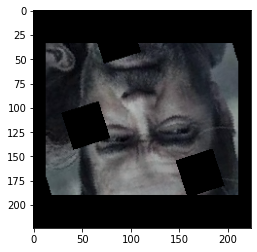

In [ ]:
image = img[3,:,:,:]*255.0
image = image.numpy()
image = image.astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

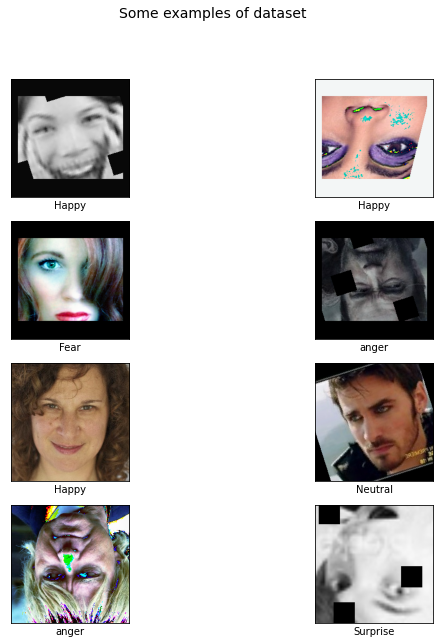

In [ ]:
int2label = {0: "Neutral",
             1: "Happy",
             2: "Sad",
             3: "Surprise",
             4: "Fear",
             5: "Disgust",
             6: "anger",
             7: "Contempt"}

fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of dataset", fontsize=14)
for j in range(4):
  for i in range(2):
    plt.subplot(4,2,j*2 + i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = img[j*2 + i,:,:,:]*255.0
    image = image.numpy()
    image = image.astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(int2label[np.argmax(label[j*2 + i])])
plt.show()

# Model

In [ ]:
NUM_CLASSES = 7
EPOCHS = 10
TRAIN_STEPS = num_train//BATCH_SIZE + 1
TRAIN_STEPS

1954

In [ ]:
VAL_STEPS = num_val//BATCH_SIZE_TEST
VAL_STEPS

333

In [ ]:
def cce_with_label_smoothing(y_true,y_pred):
  return tf.keras.losses.categorical_crossentropy(y_true,y_pred,label_smoothing=0.2)

In [ ]:
from tensorflow.keras.applications import EfficientNetB5, Xception,ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
def EfficientNetB5_model():
  # create the base pre-trained model
  base_model =  Xception(include_top=False, weights = 'imagenet', input_shape = (image_size, image_size, 3))

  model = tf.keras.Sequential()
  model.add(base_model)
  #model.add(BatchNormalization(axis=-1))
  model.add(GlobalAveragePooling2D())
  model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES, activation='softmax'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
  #lr_sc = tf.keras.optimizers.schedules.ExponentialDecay(1e-4,500 ,decay_rate=0.96)
  #optimizer = tf.keras.optimizers.Adam(lr_sc,beta_1=0.9,beta_2=0.999)
  for layer in base_model.layers:
    layer.trainable = True
  model.compile(loss= cce_with_label_smoothing,
                optimizer = optimizer,
                loss_weights=[0.13940939, 0.13540248, 0.13724981, 0.1307109 , 0.11552406, 0.18781098, 0.11389237],
                metrics=['accuracy'])
  return model

In [ ]:
model = EfficientNetB5_model()

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
model.load_weights('/content/drive/MyDrive/AffectNet/chs/weights-xception-newdata+wl-run5-03-0.6718.hdf5')

In [ ]:
model.save('/content/drive/MyDrive/AffectNet/our_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint
filepath="/content/drive/MyDrive/AffectNet/chs/weights-xception-newdata+wl-adam-run0-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',
                             verbose=1,
                             save_weights_only=True,
                             save_best_only=True,
                             mode='max')
#callbacks_list = [ checkpoint,tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,) ]
callbacks_list = [ checkpoint]

history = model.fit(ds_train,
                    epochs= EPOCHS,
                    validation_data = ds_val,
                    steps_per_epoch= TRAIN_STEPS,
                    validation_steps = VAL_STEPS,
                    callbacks = callbacks_list)

In [ ]:
Epoch 1/10
1954/1954 [==============================] - ETA: 0s - loss: 1.4181 - accuracy: 0.5933
Epoch 00001: val_accuracy improved from -inf to 0.62397, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run1-01-0.6240.hdf5
1954/1954 [==============================] - 2677s 1s/step - loss: 1.4181 - accuracy: 0.5933 - val_loss: 1.3716 - val_accuracy: 0.6240
Epoch 2/10
1954/1954 [==============================] - ETA: 0s - loss: 1.3773 - accuracy: 0.6212
Epoch 00002: val_accuracy improved from 0.62397 to 0.64358, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run1-02-0.6436.hdf5
1954/1954 [==============================] - 2617s 1s/step - loss: 1.3773 - accuracy: 0.6212 - val_loss: 1.3377 - val_accuracy: 0.6436
Epoch 3/10
1954/1954 [==============================] - ETA: 0s - loss: 1.3452 - accuracy: 0.6403
Epoch 00003: val_accuracy improved from 0.64358 to 0.65109, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run1-03-0.6511.hdf5
1954/1954 [==============================] - 2570s 1s/step - loss: 1.3452 - accuracy: 0.6403 - val_loss: 1.3308 - val_accuracy: 0.6511
Epoch 1/10
1954/1954 [==============================] - ETA: 0s - loss: 1.3797 - accuracy: 0.6205
Epoch 00001: val_accuracy improved from -inf to 0.64555, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run2-01-0.6456.hdf5
1954/1954 [==============================] - 2619s 1s/step - loss: 1.3797 - accuracy: 0.6205 - val_loss: 1.3425 - val_accuracy: 0.6456
Epoch 2/10
1954/1954 [==============================] - ETA: 0s - loss: 1.3496 - accuracy: 0.6385
Epoch 00002: val_accuracy improved from 0.64555 to 0.65550, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run2-02-0.6555.hdf5
1954/1954 [==============================] - 2598s 1s/step - loss: 1.3496 - accuracy: 0.6385 - val_loss: 1.3323 - val_accuracy: 0.6555
Epoch 3/10
1954/1954 [==============================] - ETA: 0s - loss: 1.3288 - accuracy: 0.6534
Epoch 00003: val_accuracy improved from 0.65550 to 0.65822, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run2-03-0.6582.hdf5
1954/1954 [==============================] - 2551s 1s/step - loss: 1.3288 - accuracy: 0.6534 - val_loss: 1.3243 - val_accuracy: 0.6582
Epoch 4/10
1954/1954 [==============================] - ETA: 0s - loss: 1.3084 - accuracy: 0.6677
Epoch 00004: val_accuracy improved from 0.65822 to 0.66179, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run2-04-0.6618.hdf5
1954/1954 [==============================] - 2560s 1s/step - loss: 1.3084 - accuracy: 0.6677 - val_loss: 1.3244 - val_accuracy: 0.6618
Epoch 5/10
1954/1954 [==============================] - ETA: 0s - loss: 1.2886 - accuracy: 0.6776
Epoch 00005: val_accuracy improved from 0.66179 to 0.66845, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata-run2-05-0.6684.hdf5
1954/1954 [==============================] - 2603s 1s/step - loss: 1.2886 - accuracy: 0.6776 - val_loss: 1.3120 - val_accuracy: 0.6684
Epoch 1/10
1954/1954 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.6575
Epoch 00001: val_accuracy improved from -inf to 0.66573, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata+wl-run5-01-0.6657.hdf5
1954/1954 [==============================] - 3458s 2s/step - loss: 0.2107 - accuracy: 0.6575 - val_loss: 0.2092 - val_accuracy: 0.6657
Epoch 2/10
1954/1954 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.6766
Epoch 00002: val_accuracy did not improve from 0.66573
1954/1954 [==============================] - 3416s 2s/step - loss: 0.2056 - accuracy: 0.6766 - val_loss: 0.2121 - val_accuracy: 0.6583
Epoch 3/10
1954/1954 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.6918
Epoch 00003: val_accuracy improved from 0.66573 to 0.67183, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-newdata+wl-run5-03-0.6718.hdf5
1954/1954 [==============================] - 3418s 2s/step - loss: 0.2020 - accuracy: 0.6918 - val_loss: 0.2099 - val_accuracy: 0.6718
Epoch 4/10
1954/1954 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.7052
Epoch 00004: val_accuracy did not improve from 0.67183
1954/1954 [==============================] - 3396s 2s/step - loss: 0.1989 - accuracy: 0.7052 - val_loss: 0.2101 - val_accuracy: 0.6707



In [ ]:
Epoch 1/10
1174/1174 [==============================] - ETA: 0s - loss: 1.8780 - accuracy: 0.3157
Epoch 00001: val_accuracy improved from -inf to 0.45300, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-01-0.4530.hdf5
1174/1174 [==============================] - 1588s 1s/step - loss: 1.8780 - accuracy: 0.3157 - val_loss: 1.6963 - val_accuracy: 0.4530
Epoch 2/10
1174/1174 [==============================] - ETA: 0s - loss: 1.7002 - accuracy: 0.4496
Epoch 00002: val_accuracy improved from 0.45300 to 0.48450, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-02-0.4845.hdf5
1174/1174 [==============================] - 1574s 1s/step - loss: 1.7002 - accuracy: 0.4496 - val_loss: 1.6489 - val_accuracy: 0.4845
Epoch 3/10
1174/1174 [==============================] - ETA: 0s - loss: 1.6353 - accuracy: 0.4912
Epoch 00003: val_accuracy improved from 0.48450 to 0.50625, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-03-0.5063.hdf5
1174/1174 [==============================] - 1585s 1s/step - loss: 1.6353 - accuracy: 0.4912 - val_loss: 1.6342 - val_accuracy: 0.5063
Epoch 4/10
1174/1174 [==============================] - ETA: 0s - loss: 1.5957 - accuracy: 0.5169
Epoch 00004: val_accuracy improved from 0.50625 to 0.52075, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-04-0.5207.hdf5
1174/1174 [==============================] - 1590s 1s/step - loss: 1.5957 - accuracy: 0.5169 - val_loss: 1.5994 - val_accuracy: 0.5207
Epoch 5/10
1174/1174 [==============================] - ETA: 0s - loss: 1.5734 - accuracy: 0.5304
Epoch 00005: val_accuracy improved from 0.52075 to 0.52975, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-05-0.5297.hdf5
1174/1174 [==============================] - 1596s 1s/step - loss: 1.5734 - accuracy: 0.5304 - val_loss: 1.5778 - val_accuracy: 0.5297
Epoch 6/10
1174/1174 [==============================] - ETA: 0s - loss: 1.5517 - accuracy: 0.5450
Epoch 00006: val_accuracy improved from 0.52975 to 0.53150, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-06-0.5315.hdf5
1174/1174 [==============================] - 1590s 1s/step - loss: 1.5517 - accuracy: 0.5450 - val_loss: 1.5716 - val_accuracy: 0.5315
Epoch 7/10
1174/1174 [==============================] - ETA: 0s - loss: 1.5321 - accuracy: 0.5586
Epoch 00007: val_accuracy improved from 0.53150 to 0.54400, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-07-0.5440.hdf5
1174/1174 [==============================] - 1595s 1s/step - loss: 1.5321 - accuracy: 0.5586 - val_loss: 1.5655 - val_accuracy: 0.5440
Epoch 8/10
1174/1174 [==============================] - ETA: 0s - loss: 1.5158 - accuracy: 0.5689
Epoch 00008: val_accuracy improved from 0.54400 to 0.56375, saving model to /content/drive/MyDrive/AffectNet/chs/weights-xception-sig-run0-08-0.5638.hdf5
1174/1174 [==============================] - 1590s 1s/step - loss: 1.5158 - accuracy: 0.5689 - val_loss: 1.5288 - val_accuracy: 0.5638

In [ ]:
h0 = {'accuracy': [0.2965555787086487,
  0.4170038402080536,
  0.46212202310562134,
  0.48528003692626953,
  0.49933454394340515,
  0.5121645927429199,
  0.5257399678230286,
  0.5346571803092957,
  0.544346272945404,
  0.5551000833511353],
 'loss': [1.9183721542358398,
  1.7505545616149902,
  1.6860356330871582,
  1.652921199798584,
  1.626558780670166,
  1.6077977418899536,
  1.5900479555130005,
  1.5746004581451416,
  1.558451771736145,
  1.5449646711349487],
 'val_accuracy': [0.40625,
  0.46799999475479126,
  0.44850000739097595,
  0.5257499814033508,
  0.49050000309944153,
  0.5249999761581421,
  0.48899999260902405,
  0.5325000286102295,
  0.5492500066757202,
  0.5634999871253967],
 'val_loss': [1.7514656782150269,
  1.6733512878417969,
  1.7227815389633179,
  1.5801509618759155,
  1.641913890838623,
  1.5838892459869385,
  1.644606351852417,
  1.5724586248397827,
  1.5651421546936035,
  1.5355054140090942]}

{'accuracy': [0.2965555787086487,
  0.4170038402080536,
  0.46212202310562134,
  0.48528003692626953,
  0.49933454394340515,
  0.5121645927429199,
  0.5257399678230286,
  0.5346571803092957,
  0.544346272945404,
  0.5551000833511353],
 'loss': [1.9183721542358398,
  1.7505545616149902,
  1.6860356330871582,
  1.652921199798584,
  1.626558780670166,
  1.6077977418899536,
  1.5900479555130005,
  1.5746004581451416,
  1.558451771736145,
  1.5449646711349487],
 'val_accuracy': [0.40625,
  0.46799999475479126,
  0.44850000739097595,
  0.5257499814033508,
  0.49050000309944153,
  0.5249999761581421,
  0.48899999260902405,
  0.5325000286102295,
  0.5492500066757202,
  0.5634999871253967],
 'val_loss': [1.7514656782150269,
  1.6733512878417969,
  1.7227815389633179,
  1.5801509618759155,
  1.641913890838623,
  1.5838892459869385,
  1.644606351852417,
  1.5724586248397827,
  1.5651421546936035,
  1.5355054140090942]}